In [7]:
import requests 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

API_key = 'Put your api key here'

countries = ['Jamaica', 'Indonesia', 'United States',  "Turkey", 'Saudi Arabia' , "Egypt", 'China']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

for country_names in countries:

    url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=metric'
    
    r = requests.get(url)
        
    data = r.json()
        
    formatted_json = json.dumps(data, sort_keys = True, indent = 4)
    
#     print(data)
    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])
            

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()    

,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Jamaica,24.61,24.56,86,2.21
1,Indonesia,22.41,22.41,56,1.55
2,United States of America,14.70,14.70,50,2.53
3,Turkey,20.40,20.40,32,3.47
4,Saudi Arabia,31.19,31.19,13,3.39


In [8]:
df.isna().sum()

Names        0
Max_Temp     0
Min_Temp     0
Humidity     0
WindSpeed    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Max_Temp,Min_Temp,Humidity,WindSpeed
count,7.000000,7.000000,7.000000,7.000000
mean,21.978571,21.624286,54.428571,2.548571
std,5.638657,6.122088,27.397428,0.991807
min,14.700000,13.510000,13.000000,1.090000
25%,18.170000,17.550000,41.000000,1.880000
50%,22.410000,22.410000,54.000000,2.530000
75%,24.605000,24.580000,71.000000,3.430000
max,31.190000,31.190000,90.000000,3.600000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      7 non-null      object 
 1   Max_Temp   7 non-null      float64
 2   Min_Temp   7 non-null      float64
 3   Humidity   7 non-null      int64  
 4   WindSpeed  7 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 408.0+ bytes


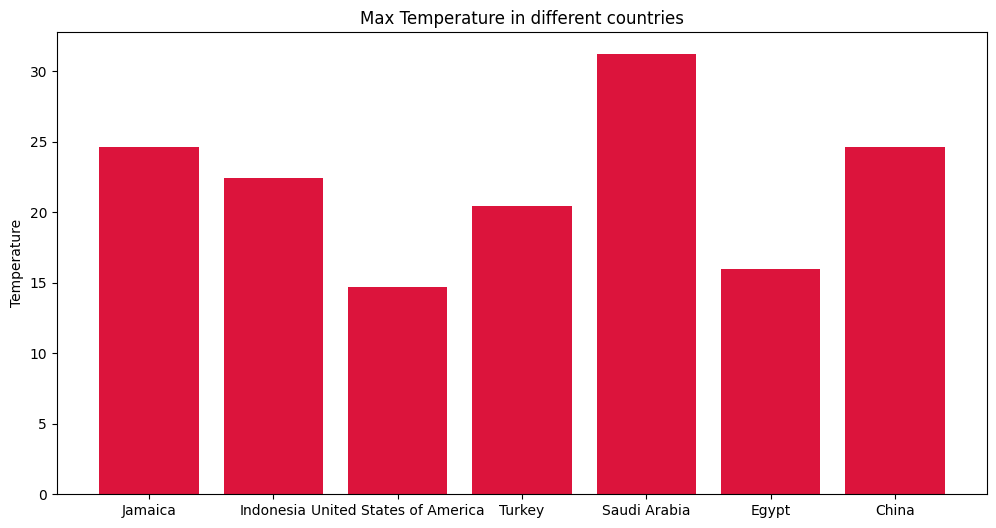

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Max_Temp'], color='crimson')
plt.title("Max Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

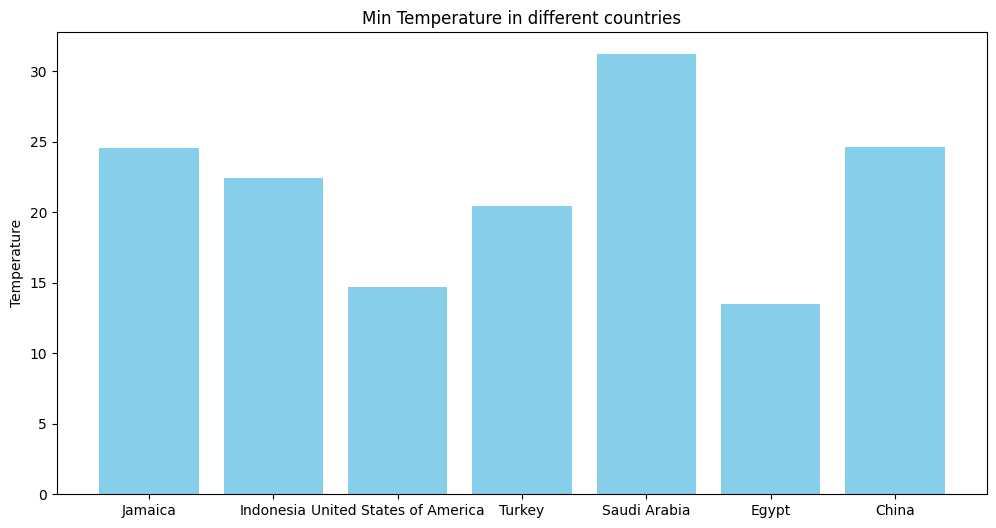

In [13]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Min_Temp'], color='skyblue')
plt.title("Min Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

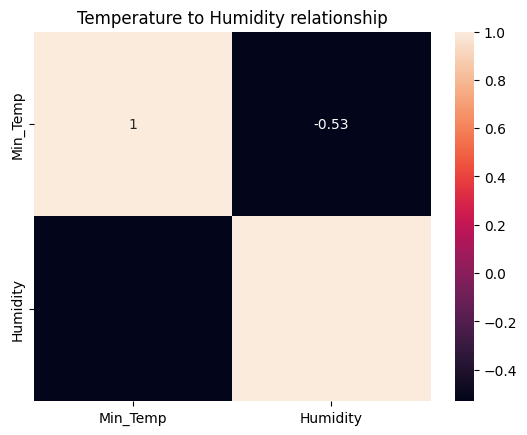

In [14]:
corre = df[['Min_Temp','Humidity']].corr()
sns.heatmap(corre, annot=True)
plt.title("Temperature to Humidity relationship")
plt.show()